# A 90° Bend waveguide
## The first thing **to load the Meep library**

In [2]:
import meep as mp
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Video
%matplotlib inline

## 環境建置 
### cell
>在**x**方向使用長度**16** μm的單元格.     
>在**y**方向使用長度**16** μm的單元格，具一定傳播距離
>>只有2D **z direction has size 0**.     
>>All 2D simulations must lie in the XY plane, as we've specified.
### Geometry
>Block : 產生一個實心長住在空間裡  
>只定XY Z方向無限 中心跟長度可看下圖  
>epsilon = 12
### Boudary layers : PML
>邊界吸收，模擬EM wave在無限大空間傳播  
>建立1微米 圍住cell的四邊boundary
### resolution
>解析度 10 pixels/μm

In [3]:
cell = mp.Vector3(16,16,0)
geometry = [mp.Block(mp.Vector3(12,1,mp.inf),
                     center=mp.Vector3(-2.5,-3.5),
                     material=mp.Medium(epsilon=12)),
            mp.Block(mp.Vector3(1,12,mp.inf),
                     center=mp.Vector3(3.5,2),
                     material=mp.Medium(epsilon=12))]
pml_layers = [mp.PML(1.0)]
resolution = 10

### Set up the Sources
>設定wavelength,width=20,center,size   
>add a single point source Jz

In [4]:
sources = [mp.Source(mp.ContinuousSource(wavelength=2*(11**0.5), width=20),
                     component=mp.Ez,
                     center=mp.Vector3(-7,-3.5),
                     size=mp.Vector3(0,1))]

### Simulation object
>based on all the previously defined

In [5]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

### Visualization
>pml 綠色部分 source 紅色

     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,2,0)
          size (1,12,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


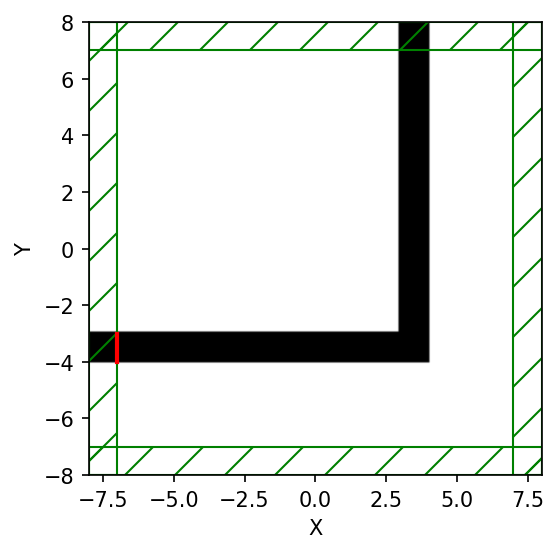

In [8]:
f = plt.figure(dpi=150)
sim.plot2D(ax = f.gca())
plt.show()

### simulation(上色)
>先配顏色0~1  
>>colors nodes 相對應的顏色和數值0~1線性傳換   

> Animate 將 sim轉換成動畫 配上剛剛的值

In [15]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

colors = ["darkslateblue","blue", "black", "red","yellow"]#相對應的顏色
nodes = [0.0,0.1, 0.5, 0.8,1.0]# 波0~1(MAX)相對應的值轉換顏色
mycmap = LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))#線性變化顏色
def modu_f(fd):
    output = np.sign(fd) * np.abs(fd) ** 0.7
    return output
f = plt.figure(dpi=150)
Animate = mp.Animate2D(sim, fields=mp.Ez, f=f, realtime=False, normalize=True
                       ,field_parameters={'post_process':modu_f,'alpha':1, 'cmap':mycmap}
                       ,source_parameters={'alpha':1,'color':'white','linewidth':0.5,'hatch':''})
sim.run(mp.at_every(0.5,Animate),until=100)
plt.close()

FloatProgress(value=300.0, description='0% done ', max=400.0, min=300.0)

     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,2,0)
          size (1,12,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
on time step 6000 (time=300), 0.0242146 s/step
Normalizing field data...
run 2 finished at t = 400.0 (8000 timesteps)


### generate mp4(GIF)
>第一次生成 要先回終端機下載  
sudo apt install ffmpeg  
不然會有錯誤**FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg'**

In [16]:
filename = "bent_waveguide.gif"
fps = 10
Animate.to_gif(fps,filename)
Video(filename)

Generating GIF...


### simulation 圖
>先清空sim 重新定義 cell geometry  
>再畫出sim圖

-----------
Initializing structure...
time for choose_chunkdivision = 0.000566959 s
Working in 2D dimensions.
Computational cell is 16 x 40 x 0 with resolution 10
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,17,0)
          size (1,42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.077554 s
-----------


FloatProgress(value=0.0, description='0% done ', max=400.0)

run 1 finished at t = 400.0 (8000 timesteps)
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,17,0)
          size (1,42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


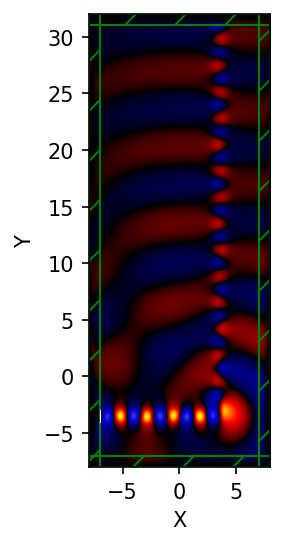

In [8]:
sim.reset_meep()
cell = mp.Vector3(16,40,0)
geometry = [mp.Block(mp.Vector3(12,1,mp.inf),
                     center=mp.Vector3(-2.5,-3.5),
                     material=mp.Medium(epsilon=12)),
            mp.Block(mp.Vector3(1,42,mp.inf),
                     center=mp.Vector3(3.5,17),
                     material=mp.Medium(epsilon=12))]
sim.cell_size = cell
sim.geometry = geometry
sim.geometry_center = mp.Vector3(0,12,0)

sim.run(until=400)

plt.figure(dpi=150)
sim.plot2D(fields=mp.Ez,field_parameters={'post_process':modu_f,'alpha':1, 'cmap':mycmap}
                       ,source_parameters={'alpha':1,'color':'white','linewidth':0.5,'hatch':''})
plt.show()

### $x\times t$切面圖
>

-----------
Initializing structure...
time for choose_chunkdivision = 0.000125885 s
Working in 2D dimensions.
Computational cell is 16 x 40 x 0 with resolution 10
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,17,0)
          size (1,42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.07862 s
-----------


FloatProgress(value=0.0, description='0% done ', max=200.0)

creating output file "./eps-000000.00.h5"...
run 2 finished at t = 200.0 (4000 timesteps)


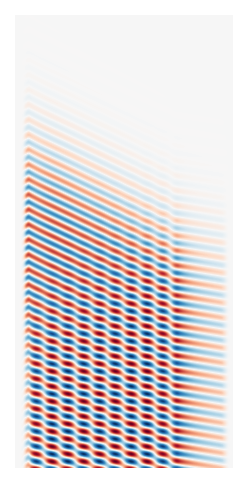

In [9]:
vals = []

def get_slice(sim):
    vals.append(sim.get_array(center=mp.Vector3(0,-3.5), size=mp.Vector3(16,0), component=mp.Ez))

sim.reset_meep()
sim.run(mp.at_beginning(mp.output_epsilon),
        mp.at_every(0.6, get_slice),
        until=200)

plt.figure(dpi=150)
plt.imshow(vals, interpolation='spline36', cmap='RdBu')
plt.axis('off')
plt.show()